In [1]:
%pylab inline
import numpy as np
import skl_emeralds.autohistogram

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Generate some sample data

In [31]:
x = np.linspace(0, 1, 100)
y1 = np.sin(4 * np.pi * x)
y2 = np.sin(2 * np.pi * x)
y = y1 + y2

y -= y.min()
y /= y.sum()

data_x = numpy.random.choice(x, size=10000, p=y)
data_y = np.random.normal(np.sin(3 * np.pi * data_x), 2, size=len(data_x))

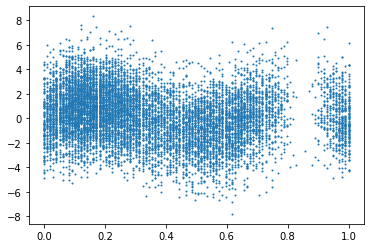

In [52]:
plt.scatter(data_x, data_y, s=1)
plt.show()

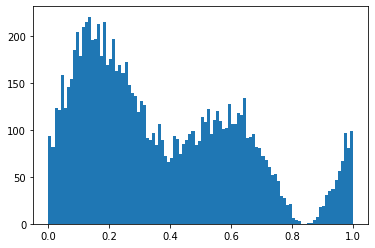

In [53]:
plt.hist(data_x, bins=100)
plt.show()

# Autohistogram

Make a histogram with the number of bins automatically determined from the data, and locate the local minimas.

In [33]:
autohist = skl_emeralds.autohistogram.auto_histogram(data_x)

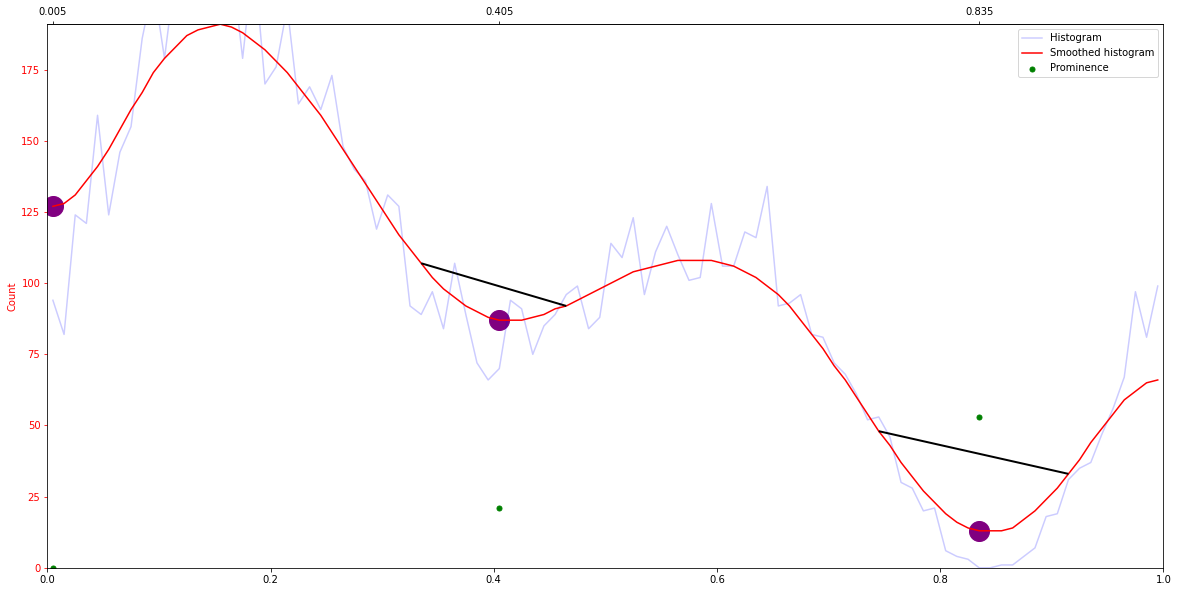

In [34]:
plt.figure(figsize=(20,10))
skl_emeralds.autohistogram.plot_autohistogram(**autohist)

In [35]:
autohist["bin_centers"][autohist["minima_idx"]]

array([0.005, 0.405, 0.835])

# Data splitting

Make a histogram with the number of bins automatically determined from the data, locate the local minimas
and use them as intervals to split the data into.


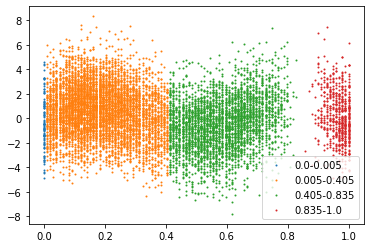

In [49]:
for start, end, subdata_x in skl_emeralds.autohistogram.auto_split_data(data_x):
    f = ~np.isnan(subdata_x)
    plt.scatter(subdata_x[f], data_y[f], label="%s-%s" % (start, end), s=1)
plt.legend()
plt.show()